# Examples Using ggplot to plot data

In [241]:
#Import packages
from ggplot import *
import pandas as pd
import numpy as np
from itertools import combinations


In [119]:
#nothing will plot without this!! :-)
%matplotlib inline

In [120]:
#We will work with example dataset from ggplot packages

#Examine pandas dataframe
#I don't know what these variables are, other than that they're meant to describe diamonds :-)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


##Some Plot Types and Options...

###http://ggplot.yhathq.com/docs/index.html contains docs/list of all plot types
###We'll try a few here

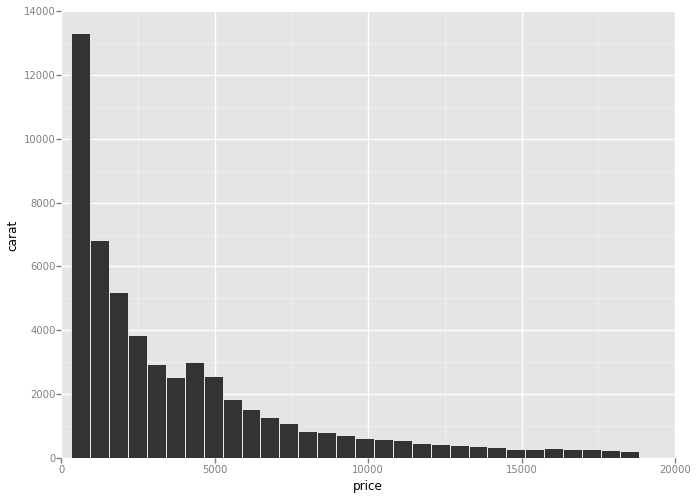

<ggplot: (279639141)>

In [122]:
#Histogram

#First define a plot object
p = ggplot(diamonds, aes(x='price', y='carat')) 
#Then, apply geom
p + geom_histogram()

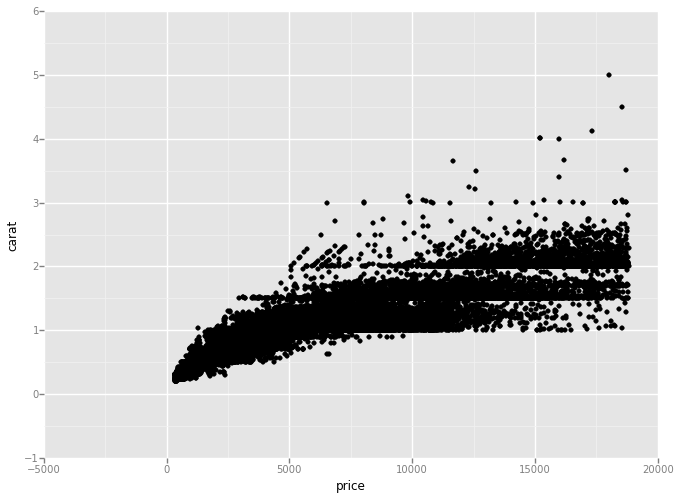

<ggplot: (273568225)>

In [123]:
#Scatterplot (using plot object previously defined, apply new geom)
p + geom_point()

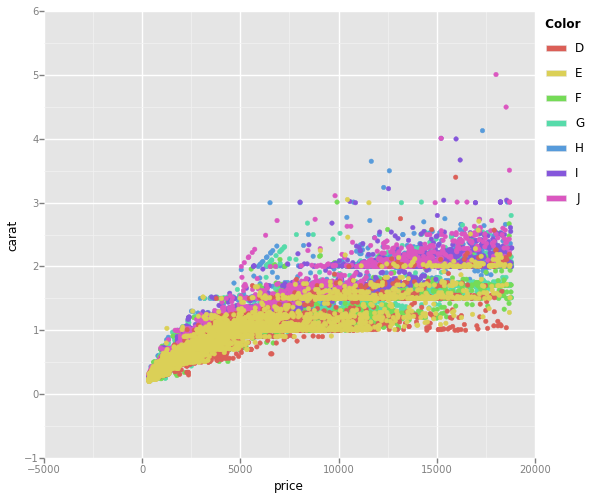

<ggplot: (285082813)>

In [134]:
#A fancier scatterplot
#Below we map plot color to the variable 'color' from the dataframe
p = ggplot(diamonds, aes(x='price', y='carat', color = 'color')) 
p + geom_point()

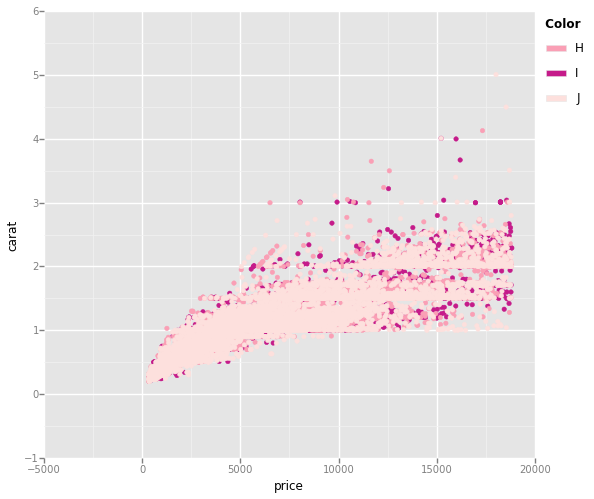

<ggplot: (285296949)>

In [158]:
#colors with palettes
#this is breaking and only using 3 colors --- and mistakenly assigning all cases to those?
p = ggplot(diamonds, aes(x='price', y='carat', color = 'color')) 
p + geom_point() + scale_color_brewer(type='seq', palette='RdPu')

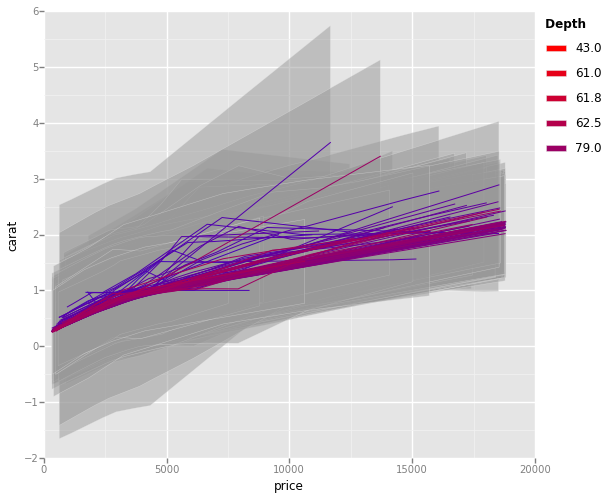

<ggplot: (284387065)>

In [186]:
#colors with gradients (also a new geom-- geom_smooth)
p = ggplot(diamonds, aes(x='price', y='carat', color = 'depth')) 
p + geom_smooth(alpha = .5) + scale_colour_gradient2(low="red", high="blue")

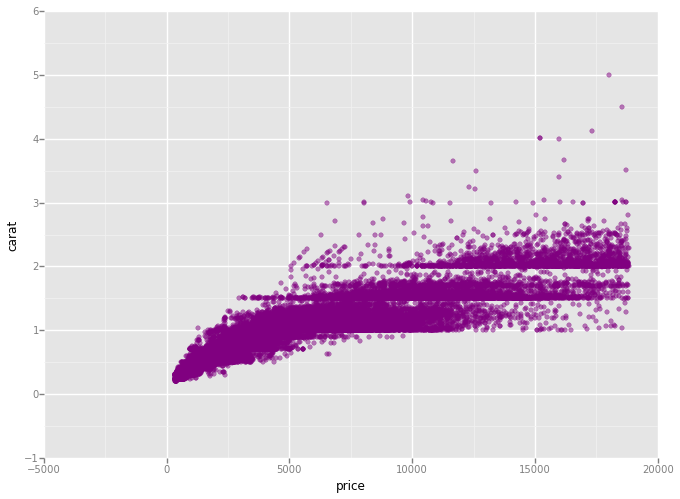

<ggplot: (282451685)>

In [185]:
#Aesthetics (like colors, shapes, sizes) can be mapped to a variable from the dataset (as above)
#Or can be assigned
p = ggplot(diamonds, aes(x='price', y='carat')) 
p + geom_point(alpha = .5, color = "purple")

In [229]:
#You should be able to assign colors to specific layers
#...this is also broken in Python ggplot :-(: 
#http://stackoverflow.com/questions/24276347/python-ggplot-how-to-change-color-in-geom-point
"""
p = ggplot(diamonds, aes(x='price', y='carat')) 
p + geom_point(aes(color = "color"), alpha = .5) + geom_smooth()
"""

'\np = ggplot(diamonds, aes(x=\'price\', y=\'carat\')) \np + geom_point(aes(color = "color"), alpha = .5) + geom_smooth()\n'

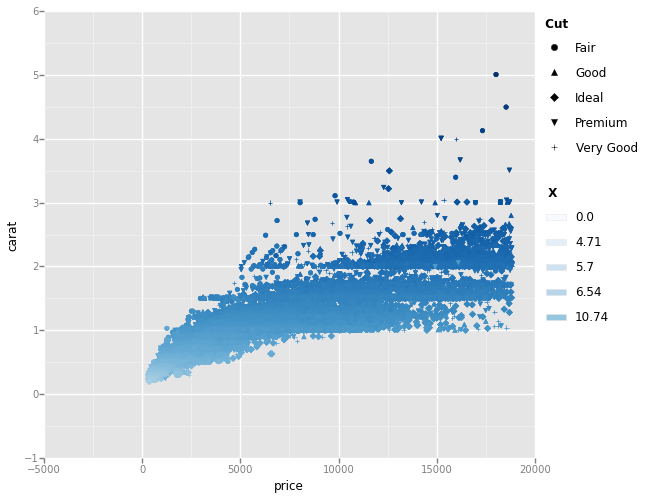

<ggplot: (335532897)>

In [256]:
#mapping shape and color to variable
p = ggplot(diamonds, aes(x='price', y='carat', shape = 'cut', color = 'x')) 
p + geom_point(size = 20) + geom_jitter()


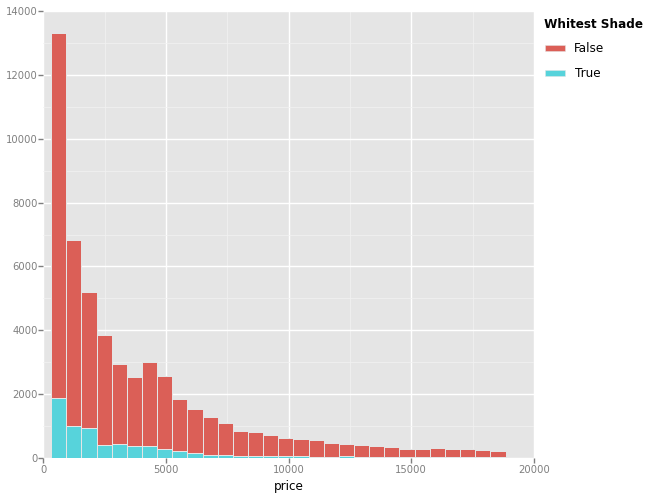

<ggplot: (283001881)>

In [203]:
diamonds["whitest shade"] = diamonds['color'] == "D"
p = ggplot(diamonds, aes(x='price', fill = 'whitest shade', order ='whitest shade')) 
p + geom_bar()

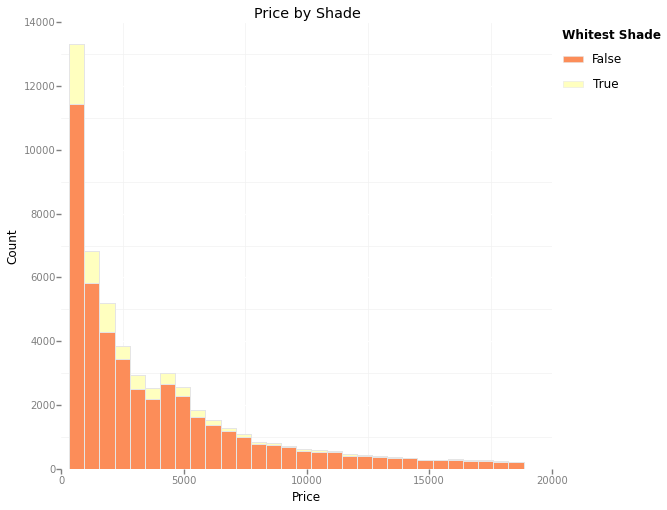

<ggplot: (332707093)>

In [228]:
#Clean up plot
#adds x and y labels and title, changes theme, changes colors and order of bars
#Changing legends doesn't work so well in the python implementation :-(

p = ggplot(diamonds, aes(x='price', fill = 'whitest shade')) 
p + geom_bar() + scale_color_brewer(type='div', palette='Spectral') + \
labs(x = "Price", y = "Count") + ggtitle("Price by Shade") + theme_bw()

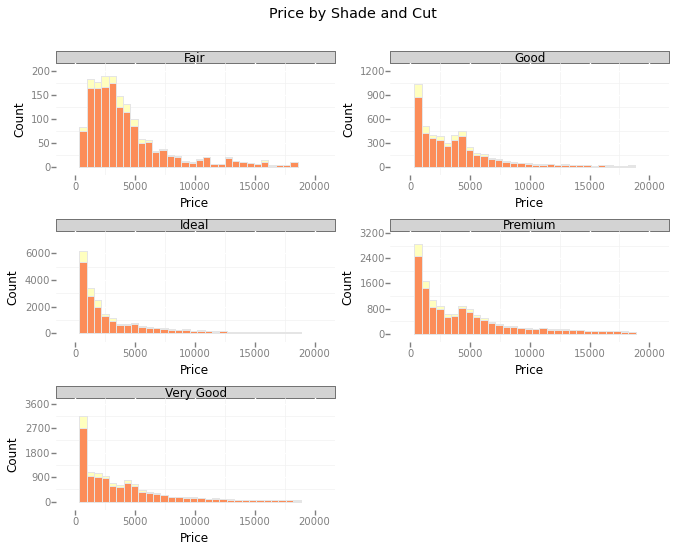

<ggplot: (335269769)>

In [231]:
#plots separately by cut using facet_grid
#facet_grid still has the no legend bug :-(

p = ggplot(diamonds, aes(x='price', fill = 'whitest shade')) 
p + geom_bar() + scale_color_brewer(type='div', palette='Spectral') + \
labs(x = "Price", y = "Count") + ggtitle("Price by Shade and Cut") + theme_bw() + facet_wrap('cut')

##Some handy function templates

In [111]:
#Generating a function to re-use a plot you like, save the output as .png
#Info on specifying optional arguments: 
#http://stackoverflow.com/questions/9539921/python-function-with-optional-arguments

#this would need to be tweaked based on optional 'kwargs' you want to use for plot...

def print_my_plot(dataframe, my_x, my_y, filename, **kwargs):
    color_mapping = kwargs.get('color_mapping', None)
    facet_var = kwargs.get('facet_var', None)
    plot_title = "Plot of " + str(my_x) + " by " + str(my_y) +", separated by " + facet_var
    p = ggplot(dataframe, aes(x=str(my_x), y=str(my_y), color = str(color_mapping))) + \
    geom_point(size = 2, shape = 5, alpha = .5) + ggtitle(plot_title) + facet_wrap(facet_var)+\
    scale_x_continuous(limits = (0, 15000)) + geom_jitter()
    ggsave(p, filename + ".png", width =10, height = 14) #... save is being wonky...
    print p

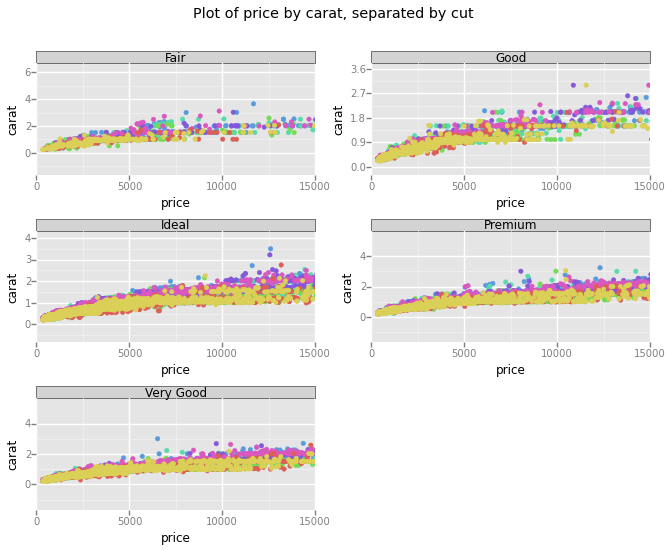

<ggplot: (334900121)>


In [233]:
print_my_plot(diamonds, "price", "carat", "my_pretty_diamond_plot", color_mapping = "color", facet_var = "cut")

In [113]:
#Save function created above (or similar) could be used in a loop to output multiple charts
# Note -- for some reason, legends won't print when using facet_wrap or facet_grid

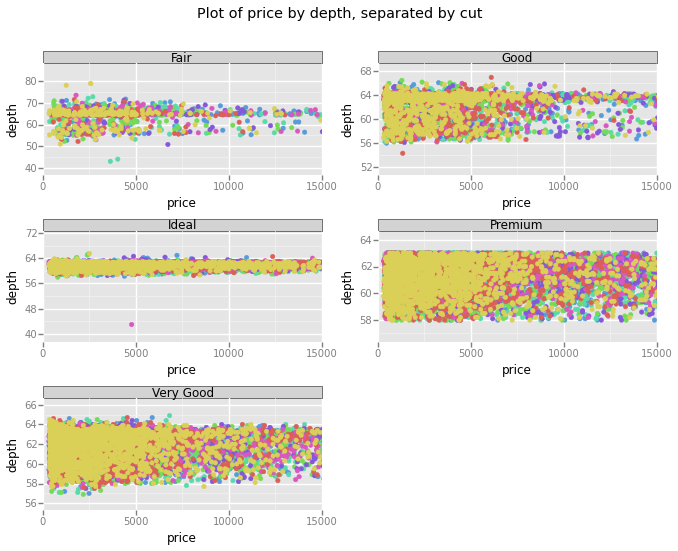

<ggplot: (328978793)>


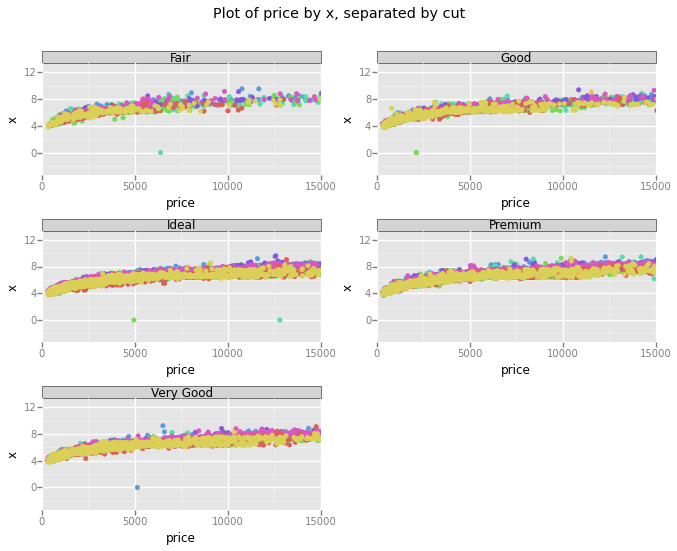

<ggplot: (350573761)>


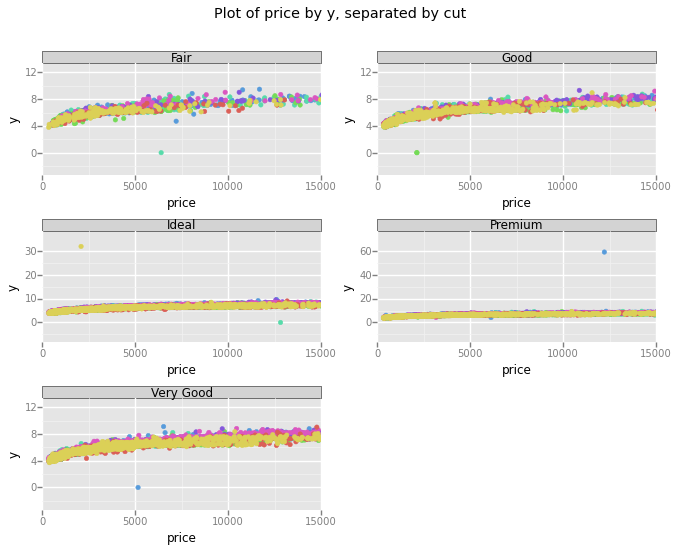

<ggplot: (345350081)>


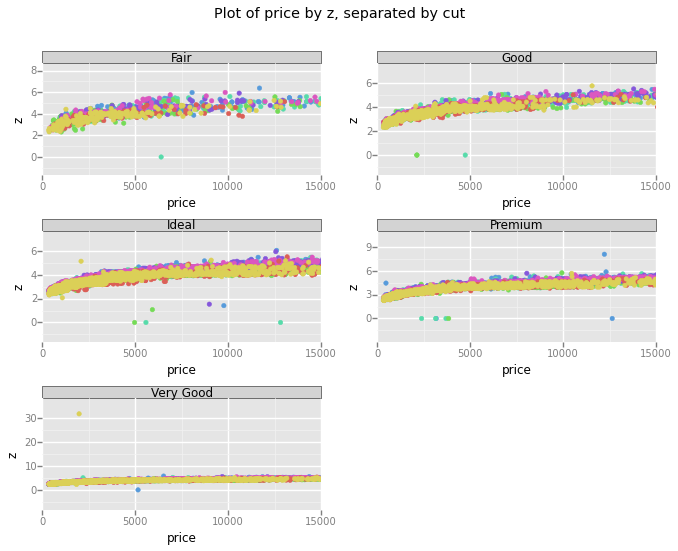

<ggplot: (328643469)>


In [234]:
my_vars = ["depth", "x", "y", "z"]

for var in my_vars:
    print_my_plot(diamonds, "price", var, "my_pretty_diamond_plot"+"_"+var, \
                  color_mapping = "color", facet_var = "cut")

In [248]:
#Generating a function to plot basic descriptive statistics for a given set of variables
def plot_basicdescriptives(dataframe, varlist):
    for var in varlist:
        p = ggplot(dataframe, aes(x= var)) + geom_histogram()
        ggsave(p, var + "_histogram.png", width =7, height = 5) 
        print p
    for var_pair in list(combinations(list(varlist), 2)):
        p2 = ggplot(dataframe, aes(x=var_pair[0], y=var_pair[1])) +geom_point()
        ggsave(p2, var_pair[0] + "-" + var_pair[1] + "_scatter.png", width =7, height = 5)
        print p2

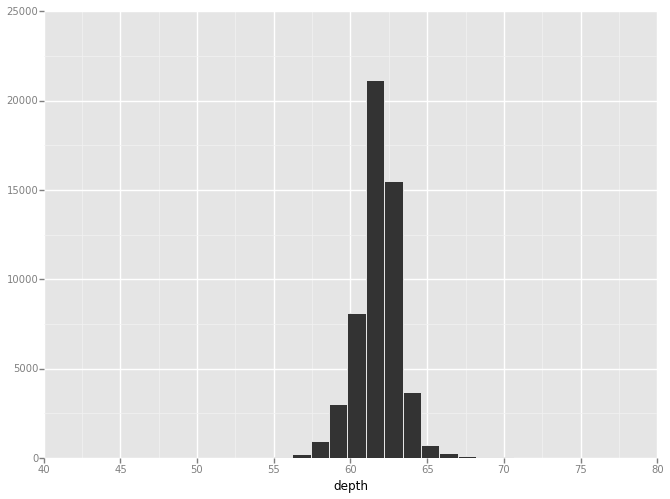

<ggplot: (335334889)>


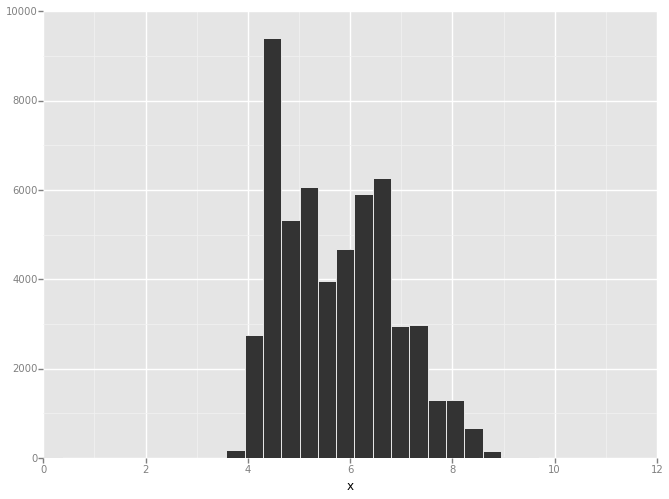

<ggplot: (343731889)>


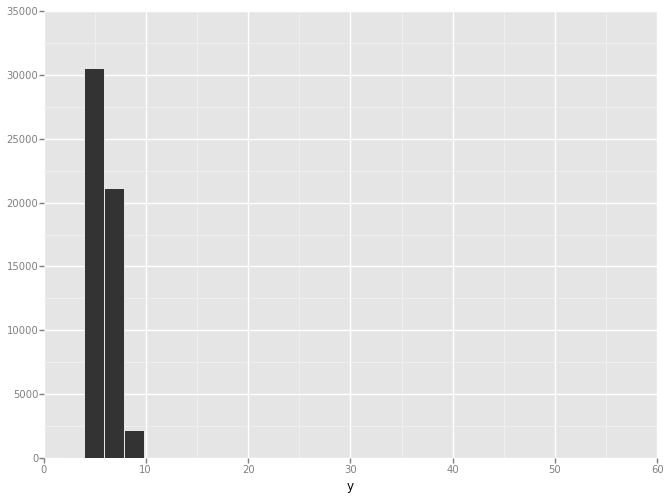

<ggplot: (336719653)>


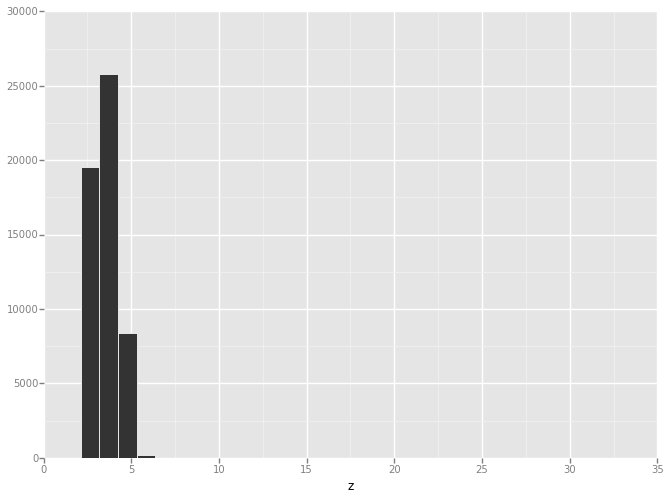

<ggplot: (345820265)>


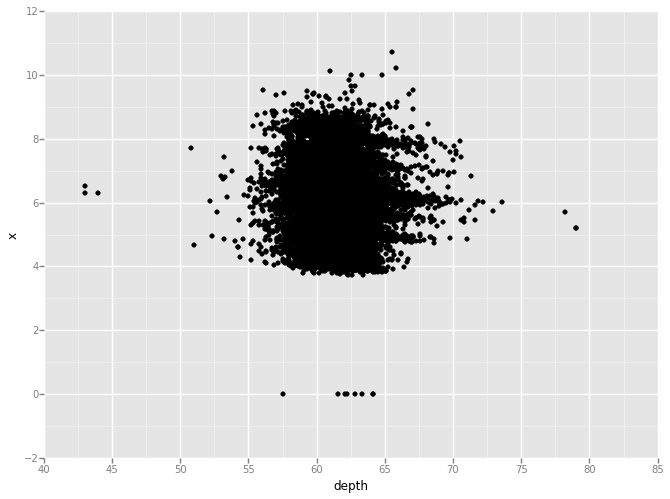

<ggplot: (343576529)>


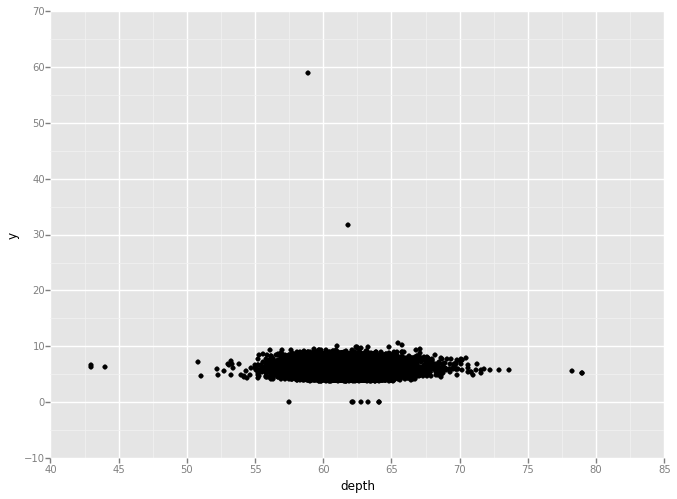

<ggplot: (350782197)>


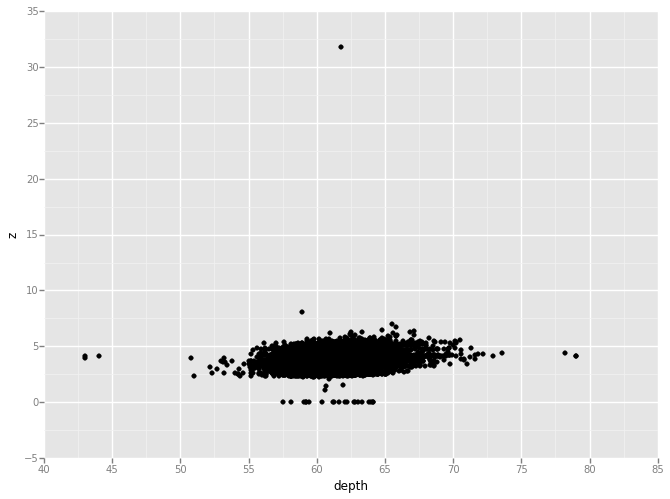

<ggplot: (346423677)>


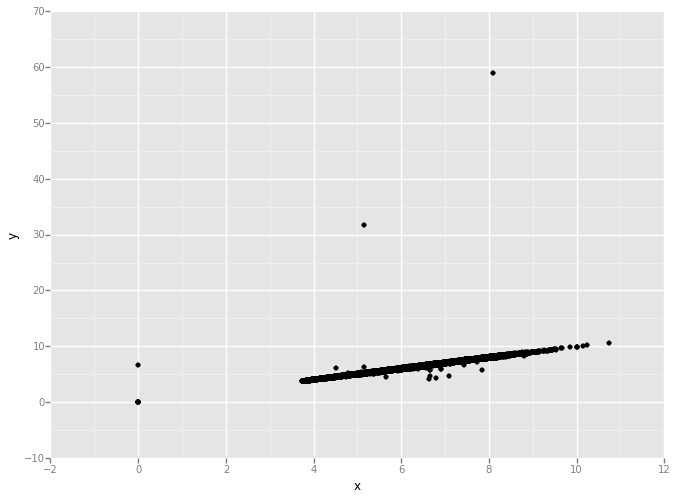

<ggplot: (331082953)>


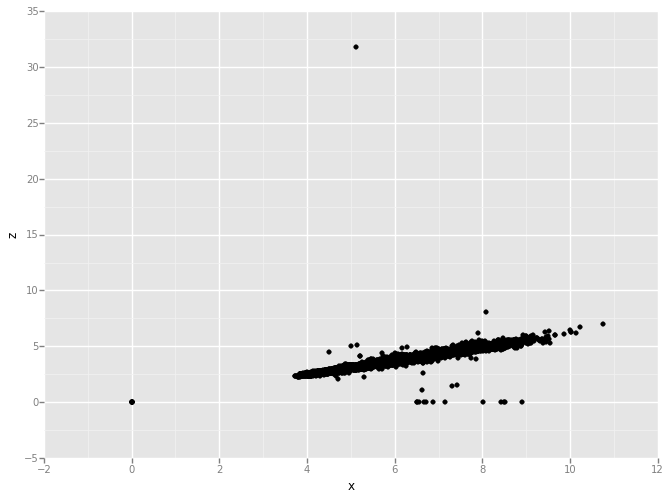

<ggplot: (350790049)>


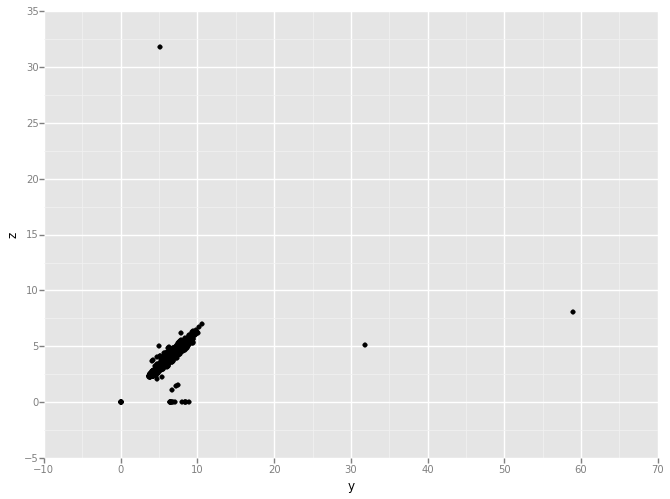

<ggplot: (338991461)>


In [249]:
plot_basicdescriptives(diamonds, my_vars)

##Final Thoughts

- ggplot in python is handy, but: a) still has some bugs, b) still lacks some features


- useful for examining data as you work, much more efficient code than matplotlib, plays nicely with pandas


- will probably still need to use ggplot in R/something else for publication and presentation ready figures :-(